# Import dependencies

In [63]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, to_hex
from sklearn.cluster import KMeans
import seaborn
import cv2

# Utility

In [12]:
### Kudos to http://www.nxn.se/valent/extract-cluster-elements-by-color-in-python

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = to_hex(colorConverter.to_rgb(c)) ## rgb2hex
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        if c == 'grey':
            continue
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-10:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

# Load the dataset 'cities_coordinates.txt'

In [11]:
### TO DO ###
X = np.loadtxt('cities_coordinates.txt', delimiter=',', usecols=(0,1,2))
y = np.loadtxt('cities_coordinates.txt', dtype=str, delimiter=',', usecols=(3))

# Hierarchical clustering and dendrograms

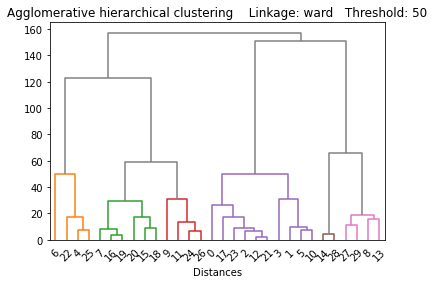

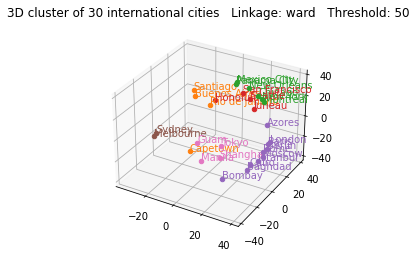

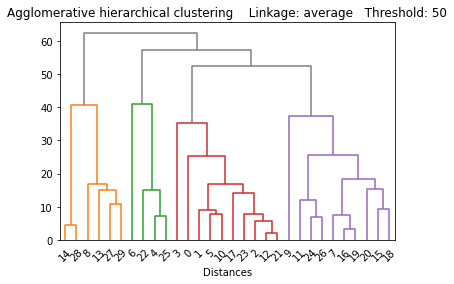

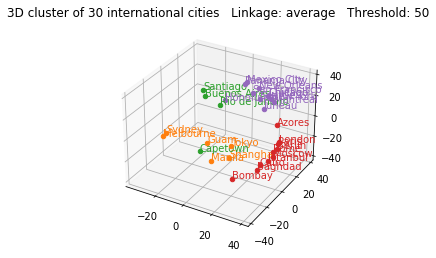

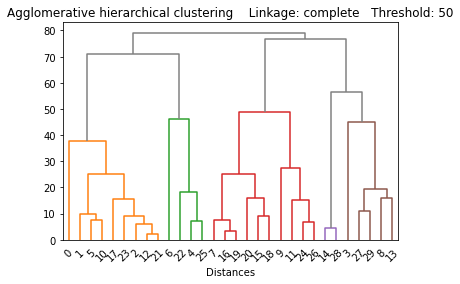

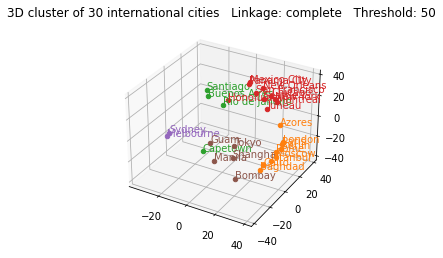

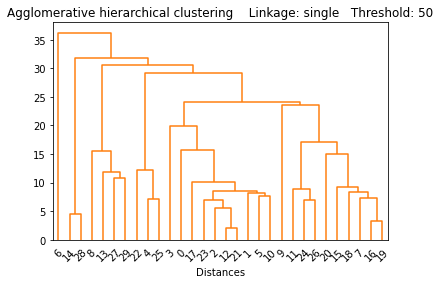

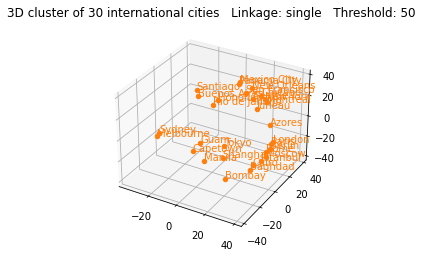

In [19]:
color_threshold = 50
for l, linkage_type in enumerate(['ward', 'average', 'complete', 'single']):
    # Do hierarchichal clustering:
    clusters_hierarchy = linkage(X, method=linkage_type)
    plt.figure(l+1)
    plt.title("Agglomerative hierarchical clustering    Linkage: " + str(linkage_type) + "   Threshold: " + str(color_threshold))
    plt.xlabel("Distances") # Depending on the orientation of your dendrogram, it could become plt.ylabel
    # Extract and display the dendrogram:
    cities_dendrogram = dendrogram(clusters_hierarchy, color_threshold=color_threshold, above_threshold_color='grey')
    # Get the colors of every city:
    colored_clusters = get_cluster_classes(cities_dendrogram)
    fig = plt.figure(l+5)
    ax = plt.axes(projection='3d')
    ax.set_title("3D cluster of 30 international cities   Linkage: " + str(linkage_type) + "   Threshold: " + str(color_threshold))
    # Display every city on a scatter plot, with the color of its cluster: 
    for color, cluster_cities in colored_clusters.items():
        # Find the index in y of every city in cluster_cities:
        cluster_cities_idx = [int(i) for i in cluster_cities]
        for city_idx in cluster_cities_idx:
            # Extract the 3D coordinates of the city, and its name:
            city_point = X[city_idx]
            city_name = y[city_idx]
            # Add the city point to the scatterplot, color this point with the color of its cluster in the dendrogram:
            ax.scatter3D(city_point[0], city_point[1], city_point[2], c=color)
            # Annotate the scatterplot with the name of the city, colored as well:
            ax.text(city_point[0], city_point[1], city_point[2],city_name, c=color)
plt.show()

# Part 2

Load data and visualize

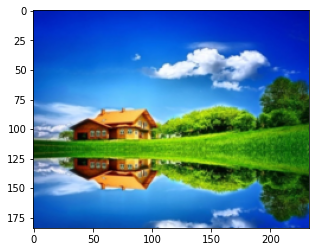

In [5]:
# Load data
X = np.loadtxt('scenery_184_233.txt', delimiter=',')

# Visualize
X_copy = np.copy(X)
X_copy = X_copy.reshape(184, 233, 3)
X_copy = np.uint8(X_copy)
plt.imshow(X_copy)

Perform clustering on X

In [10]:
sum_sqr_dists = []
ks = [item for item in range(1, 30)]

for i in ks:
    model = KMeans(n_clusters=i).fit(X)
    sum_sqr_dists.append(model.inertia_)
       

Create 'Elbow Graph' to determine k value

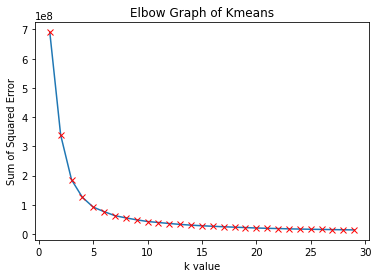

In [16]:
plt.title('Elbow Graph of Kmeans')
plt.plot(ks, sum_sqr_dists)
plt.plot(ks, sum_sqr_dists, 'rx')
plt.xlabel('k value')
plt.ylabel('Sum of Squared Error')
plt.show() 

K chosen -> 5

<AxesSubplot:>

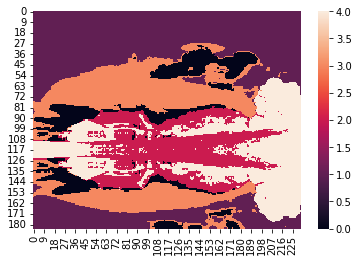

In [27]:
X_pred = KMeans(n_clusters=5).fit_predict(X)
X_pred = X_pred.reshape(184, 233)

# plt.imshow(X_pred, cmap=seaborn.heatmap)
seaborn.heatmap(X_pred)

Separate masks and replot

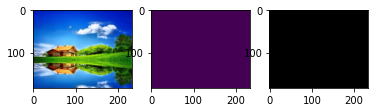

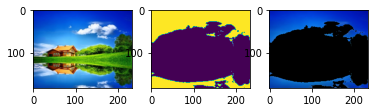

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


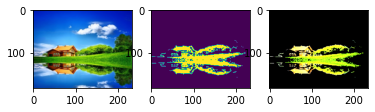

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


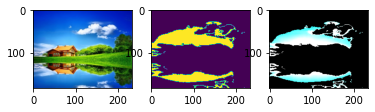

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


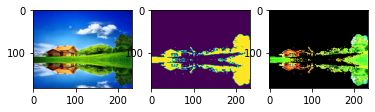

In [75]:
num_submask = np.unique(X_pred) 

for mask_val in num_submask:
    mask = np.ma.masked_not_equal(X_pred, mask_val)
    # np.where(mask.data == 0, 0)
    mask = np.ma.filled(mask, fill_value=0)
    mask3d = np.stack((mask, mask, mask), axis=2)
    X_masked = X_copy * mask3d
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(X_copy)
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.imshow(X_masked)
    plt.show()
